In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

###
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    print(city_url)

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=port+alfred
Processing Record 1 of Set 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=sassandra
Processing Record 2 of Set 1 | sassandra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=zeya
Processing Record 3 of Set 1 | zeya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=albany
Processing Record 4 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=vaini
Processing Record 5 of Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=faanui
Processing Record 6 of Set 1 | faanui
http://api.openweathermap.org/data/2.5/wea

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=dikson
Processing Record 5 of Set 2 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=sitka
Processing Record 6 of Set 2 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=new+norfolk
Processing Record 7 of Set 2 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=alofi
Processing Record 8 of Set 2 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=fairbanks
Processing Record 9 of Set 2 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=ilulissat
Processing Record 10 of Set 2 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dc

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=pitimbu
Processing Record 9 of Set 3 | pitimbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=ossora
Processing Record 10 of Set 3 | ossora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=karratha
Processing Record 11 of Set 3 | karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=chagda
Processing Record 12 of Set 3 | chagda
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=upernavik
Processing Record 13 of Set 3 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=leningradskiy
Processing Record 14 of Set 3 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=gunnedah
Processing Record 11 of Set 4 | gunnedah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=mehamn
Processing Record 12 of Set 4 | mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=sampit
Processing Record 13 of Set 4 | sampit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=kavieng
Processing Record 14 of Set 4 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=msowero
Processing Record 15 of Set 4 | msowero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=tasbuget
Processing Record 16 of Set 4 | tasbuget
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=hithadhoo
Processing Record 15 of Set 5 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=tucuman
Processing Record 16 of Set 5 | tucuman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=dingle
Processing Record 17 of Set 5 | dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=safaga
Processing Record 18 of Set 5 | safaga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=kahului
Processing Record 19 of Set 5 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=maniitsoq
Processing Record 20 of Set 5 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=tashla
Processing Record 19 of Set 6 | tashla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=kazalinsk
Processing Record 20 of Set 6 | kazalinsk
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=aklavik
Processing Record 21 of Set 6 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=khasan
Processing Record 22 of Set 6 | khasan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=san+buenaventura
Processing Record 23 of Set 6 | san buenaventura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=paignton
Processing Record 24 of Set 6 | paignton
http://api.openweathermap.org/data/2.5/weather

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=faro
Processing Record 23 of Set 7 | faro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=zheleznodorozhnyy
Processing Record 24 of Set 7 | zheleznodorozhnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=kecskemet
Processing Record 25 of Set 7 | kecskemet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=coquimbo
Processing Record 26 of Set 7 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=la+serena
Processing Record 27 of Set 7 | la serena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=okhotsk
Processing Record 28 of Set 7 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=victor+harbor
Processing Record 26 of Set 8 | victor harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=oriximina
Processing Record 27 of Set 8 | oriximina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=aguimes
Processing Record 28 of Set 8 | aguimes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=katsuura
Processing Record 29 of Set 8 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=qaqortoq
Processing Record 30 of Set 8 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=labuan
Processing Record 31 of Set 8 | labuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5c

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=ejura
Processing Record 29 of Set 9 | ejura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=barranca
Processing Record 30 of Set 9 | barranca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=asfi
Processing Record 31 of Set 9 | asfi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=avera
Processing Record 32 of Set 9 | avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=lazaro+cardenas
Processing Record 33 of Set 9 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=lilongwe
Processing Record 34 of Set 9 | lilongwe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=sioux+lookout
Processing Record 32 of Set 10 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=waslala
Processing Record 33 of Set 10 | waslala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=joshimath
Processing Record 34 of Set 10 | joshimath
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=luganville
Processing Record 35 of Set 10 | luganville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=zhigansk
Processing Record 36 of Set 10 | zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=la+ronge
Processing Record 37 of Set 10 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=farafangana
Processing Record 37 of Set 11 | farafangana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=wanning
Processing Record 38 of Set 11 | wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=sao+sebastiao
Processing Record 39 of Set 11 | sao sebastiao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=panaitolion
Processing Record 40 of Set 11 | panaitolion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=grand-santi
Processing Record 41 of Set 11 | grand-santi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=karkaralinsk
Processing Record 42 of Set 11 | karkaralinsk
City not found. Skipping...
http://api.ope

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=seymchan
Processing Record 40 of Set 12 | seymchan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=taylor
Processing Record 41 of Set 12 | taylor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=vanimo
Processing Record 42 of Set 12 | vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=idritsa
Processing Record 43 of Set 12 | idritsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=quelimane
Processing Record 44 of Set 12 | quelimane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf6dcb40f94e&q=airai
Processing Record 45 of Set 12 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34d8a5cbd0ec1e96237bf

In [7]:
print(len(city_data))

569


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.59,26.89,71.06,62,0,8.10,ZA,2020-11-08 06:39:46
1,Sassandra,4.95,-6.08,77.76,85,96,1.86,CI,2020-11-08 06:39:46
2,Zeya,53.75,127.27,11.98,80,0,7.07,RU,2020-11-08 06:39:46
3,Albany,42.60,-73.97,50.00,100,20,2.84,US,2020-11-08 06:35:03
4,Vaini,-21.20,-175.20,75.20,83,20,4.70,TO,2020-11-08 06:39:46
5,Faanui,-16.48,-151.75,78.93,80,14,12.26,PF,2020-11-08 06:39:46
6,Mahibadhoo,3.78,72.97,84.27,67,3,4.74,MV,2020-11-08 06:39:47
7,Iracoubo,5.48,-53.20,77.49,85,50,12.77,GF,2020-11-08 06:39:47
8,Rikitea,-23.12,-134.97,71.69,75,98,18.14,PF,2020-11-08 06:39:47
9,Port Hardy,50.70,-127.42,42.80,60,5,11.41,CA,2020-11-08 06:39:47


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(20)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2020-11-08 06:39:46,-33.59,26.89,71.06,62,0,8.10
1,Sassandra,CI,2020-11-08 06:39:46,4.95,-6.08,77.76,85,96,1.86
2,Zeya,RU,2020-11-08 06:39:46,53.75,127.27,11.98,80,0,7.07
3,Albany,US,2020-11-08 06:35:03,42.60,-73.97,50.00,100,20,2.84
4,Vaini,TO,2020-11-08 06:39:46,-21.20,-175.20,75.20,83,20,4.70
5,Faanui,PF,2020-11-08 06:39:46,-16.48,-151.75,78.93,80,14,12.26
6,Mahibadhoo,MV,2020-11-08 06:39:47,3.78,72.97,84.27,67,3,4.74
7,Iracoubo,GF,2020-11-08 06:39:47,5.48,-53.20,77.49,85,50,12.77
8,Rikitea,PF,2020-11-08 06:39:47,-23.12,-134.97,71.69,75,98,18.14
9,Port Hardy,CA,2020-11-08 06:39:47,50.70,-127.42,42.80,60,5,11.41


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

today

'11/08/20'

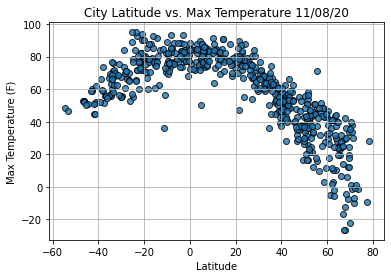

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

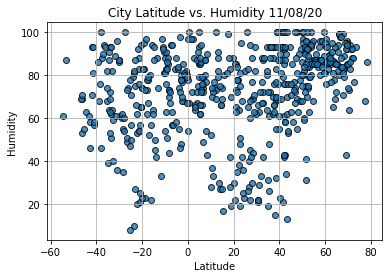

In [14]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

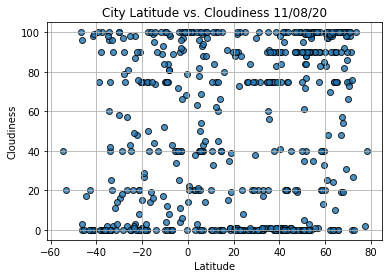

In [15]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

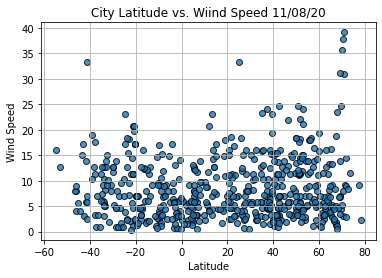

In [16]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wiind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [17]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    # Save the figure.
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City              Prescott Valley
Country                        US
Date          2020-11-08 06:39:47
Lat                         34.59
Lng                       -112.33
Max Temp                       36
Humidity                       80
Cloudiness                     90
Wind Speed                  12.75
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Sassandra,CI,2020-11-08 06:39:46,4.95,-6.08,77.76,85,96,1.86
2,Zeya,RU,2020-11-08 06:39:46,53.75,127.27,11.98,80,0,7.07
3,Albany,US,2020-11-08 06:35:03,42.60,-73.97,50.00,100,20,2.84
6,Mahibadhoo,MV,2020-11-08 06:39:47,3.78,72.97,84.27,67,3,4.74
7,Iracoubo,GF,2020-11-08 06:39:47,5.48,-53.20,77.49,85,50,12.77
...,...,...,...,...,...,...,...,...,...
558,Mayo,US,2020-11-08 06:40:58,38.89,-76.51,52.00,100,1,5.14
560,Kirkwood,US,2020-11-08 06:39:43,38.58,-90.41,61.00,77,1,4.70
566,Solnechnyy,RU,2020-11-08 06:40:59,50.72,136.63,20.03,84,35,4.97
567,Jacqueville,CI,2020-11-08 06:40:59,5.21,-4.41,80.60,88,40,3.36


In [21]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Sassandra,CI,2020-11-08 06:39:46,4.95,-6.08,77.76,85,96,1.86
2,Zeya,RU,2020-11-08 06:39:46,53.75,127.27,11.98,80,0,7.07
3,Albany,US,2020-11-08 06:35:03,42.60,-73.97,50.00,100,20,2.84
6,Mahibadhoo,MV,2020-11-08 06:39:47,3.78,72.97,84.27,67,3,4.74
7,Iracoubo,GF,2020-11-08 06:39:47,5.48,-53.20,77.49,85,50,12.77


In [22]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2020-11-08 06:39:46,-33.59,26.89,71.06,62,0,8.10
4,Vaini,TO,2020-11-08 06:39:46,-21.20,-175.20,75.20,83,20,4.70
5,Faanui,PF,2020-11-08 06:39:46,-16.48,-151.75,78.93,80,14,12.26
8,Rikitea,PF,2020-11-08 06:39:47,-23.12,-134.97,71.69,75,98,18.14
10,Busselton,AU,2020-11-08 06:39:47,-33.65,115.33,75.99,51,25,5.01


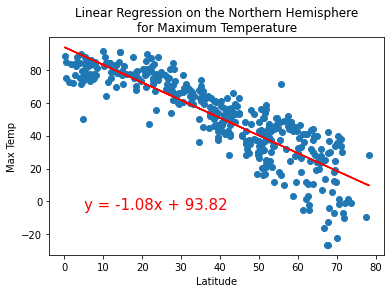

<Figure size 432x288 with 0 Axes>

In [23]:
# Linear regression on the Northern Hemisphere Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(5,-5))
# Save the figure.
plt.savefig("weather_data/Fig5.png")

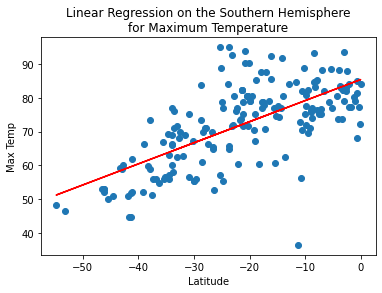

In [24]:
# Linear regression on the Southern Hemisphere Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,100))

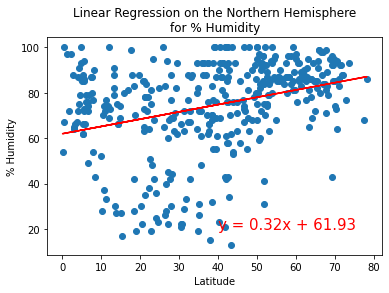

In [25]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,20))

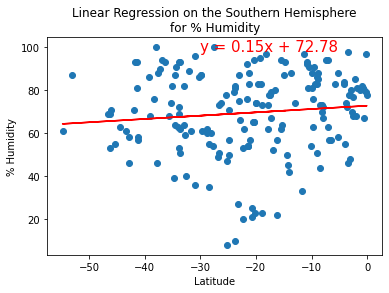

In [26]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-30,98))

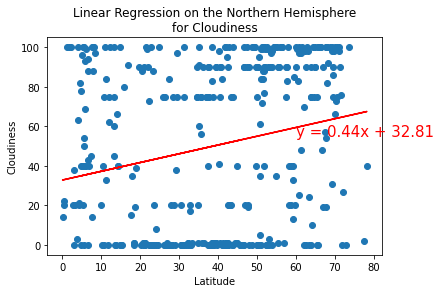

In [27]:
# Linear regression on the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Cloudiness', 'Cloudiness',(60,55))

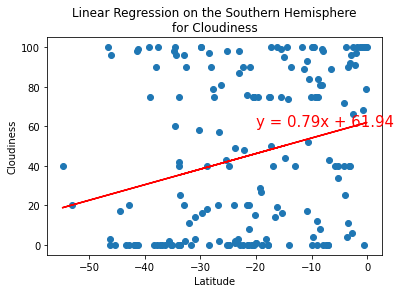

In [28]:
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Cloudiness', 'Cloudiness',(-20,60))

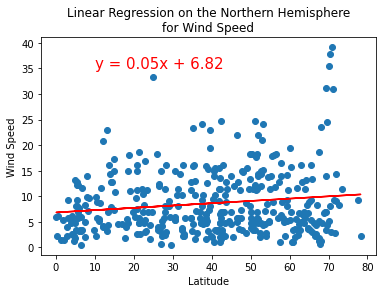

In [29]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(10,35))

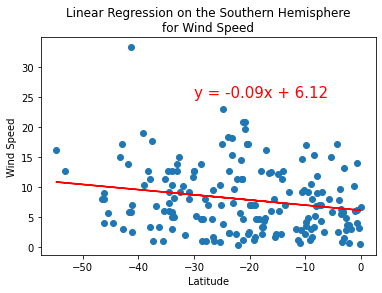

In [30]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-30,25))